In [16]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lass.datasets
import lass.pipeline
from lass.log_handling import LogLoader

from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from scipy.special import kl_div

In [2]:


eps = np.finfo(float).eps

# Cases 5 classes
cases = [
    [1.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 1.00, 0.00, 0.00, 0.00],
    [0.00, 0.5, 0.5, 0.00, 0.00],
    [0.96, 0.01, 0.01, 0.01, 0.01],
    [0.96, 0.04, 0.00, 0.00, 0.00],
    [0.51, 0.49, 0.00, 0.00, 0.00],
    [0.50, 0.50, 0.00, 0.00, 0.00],
    [0.50, 0.125, 0.125, 0.125, 0.125],
    [0.20, 0.20, 0.20, 0.20, 0.20],
    [0.20, 0.80, 0.00, 0.00, 0.00],
    [0.24, 0.19, 0.19, 0.19, 0.19],
]

print("Log Loss")
for case in cases:
    print(f"{log_loss([1], [case], labels=[1, 2, 3, 4, 5]):.8f}", case)

# print("Brier scores")
# for case in cases:
#     print(f"{brier_score_loss([1], [case[0]]):.8f}", case)

print("Kullback-Leibler Divergence")
for case in cases:
    print(f"{kl_div([1, 0, 0, 0, 0], [case]).sum():.8f}", case)

# print("-----")
# for case in cases:
#     own_loss = lambda y_true, y_pred: -sum((idx==y_true-1)*math.log(p+eps) for idx, p in enumerate(y_pred))
#     own_loss2 = lambda y_true, y_pred: -math.log(y_pred[y_true-1]+eps)
#     print(f"{own_loss(1, case):.8f}", case)
#     print(f"{own_loss2(1, case):.8f}", case)

Log Loss
0.00000000 [1.0, 0.0, 0.0, 0.0, 0.0]
34.53877639 [0.0, 1.0, 0.0, 0.0, 0.0]
34.53877639 [0.0, 0.5, 0.5, 0.0, 0.0]
0.04082199 [0.96, 0.01, 0.01, 0.01, 0.01]
0.04082199 [0.96, 0.04, 0.0, 0.0, 0.0]
0.67334455 [0.51, 0.49, 0.0, 0.0, 0.0]
0.69314718 [0.5, 0.5, 0.0, 0.0, 0.0]
0.69314718 [0.5, 0.125, 0.125, 0.125, 0.125]
1.60943791 [0.2, 0.2, 0.2, 0.2, 0.2]
1.60943791 [0.2, 0.8, 0.0, 0.0, 0.0]
1.42711636 [0.24, 0.19, 0.19, 0.19, 0.19]
Kullback-Leibler Divergence
0.00000000 [1.0, 0.0, 0.0, 0.0, 0.0]
inf [0.0, 1.0, 0.0, 0.0, 0.0]
inf [0.0, 0.5, 0.5, 0.0, 0.0]
0.04082199 [0.96, 0.01, 0.01, 0.01, 0.01]
0.04082199 [0.96, 0.04, 0.0, 0.0, 0.0]
0.67334455 [0.51, 0.49, 0.0, 0.0, 0.0]
0.69314718 [0.5, 0.5, 0.0, 0.0, 0.0]
0.69314718 [0.5, 0.125, 0.125, 0.125, 0.125]
1.60943791 [0.2, 0.2, 0.2, 0.2, 0.2]
1.60943791 [0.2, 0.8, 0.0, 0.0, 0.0]
1.42711636 [0.24, 0.19, 0.19, 0.19, 0.19]


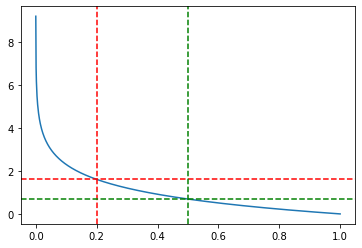

In [3]:
def log_loss_to_decision():
    x = np.linspace(0.0001, 1, 1000)
    y = -np.log(x)
    plt.plot(x, y)
    plt.axvline(0.2, color="red", linestyle="--")
    plt.axhline(-np.log(0.2), color="red", linestyle="--")
    plt.axvline(0.5, color="green", linestyle="--")
    plt.axhline(-np.log(0.5), color="green", linestyle="--")

log_loss_to_decision()

In [4]:
np.log(0.49)

-0.7133498878774648

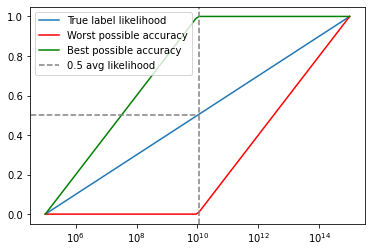

In [6]:
n_classes = 5
n_models = 100
def metric_pressure2():
    x = np.logspace(5, 15, n_models)
    y = np.linspace(0, 1, n_models) # + np.random.normal(0, 0.02, len(x)) # Typical acc performance curve
    
    # TODO: Put this on plot with likelihood the X-axis, and accuracy the Y-axis

    # 0.50-eps is the worst failure, 1.00 is the worst success (as in, takes up the most)
    # Likelihood = percent_failures*0.5 + percent_successes*1
    # with percent_failures + percent_successes = 1
    # Solving gives:
    #   percent_successes = 2*(likelihood-0.5)
    #   percent_failures = 2*(1-likelihood)
    # Accuracy = percent_successes = 2*(likelihood-0.5)
    acc_worst = 2*(np.clip(y, 0.5, 1)-0.5)

    # 0.0 is the best failure, 0.50 is the best success (as in, takes up the least)
    # Solving gives (WRONG):
    #  percent_successes = 2*(likelihood)
    #  percent_failures = 2*(0.5-likelihood)
    # Accuracy = percent_successes = 2*(likelihood)
    acc_best = np.clip(2*y, 0, 1)

    # y_log_best = (y)*np.log(1)+(1-y)*np.log(0.49)
    fig, ax1 = plt.subplots()

    ax1.plot(x, y, label="True label likelihood")
    ax1.set_xscale("log")
    ax1.set_yscale("linear")
    ax1.set_ylim(-0.05, 1.05)
    
    ax1.plot(x, acc_worst, color="red", label="Worst possible accuracy")
    ax1.plot(x, acc_best, color="green", label="Best possible accuracy")
    ax1.plot((0, x[np.argmax(y>=0.5)]), (0.5, 0.5), "--", color="grey",)
    ax1.axvline(x[np.argmax(y>=0.5)], color="grey", linestyle="--", label="0.5 avg likelihood")
    ax1.legend()

metric_pressure2()

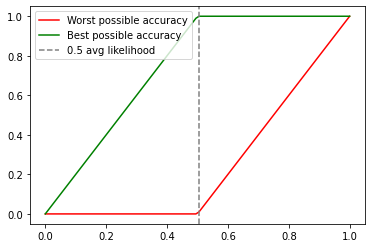

In [11]:
def metric_pressure3():
    n_likelihoods = 100
    x = np.linspace(0, 1, n_likelihoods) # likelihood
    y = np.linspace(0, 1, n_likelihoods) # accuracy
    acc_worst = 2*(np.clip(x, 0.5, 1)-0.5)
    acc_best = np.clip(2*x, 0, 1)
    fig, ax1 = plt.subplots()

    ax1.set_ylim(-0.05, 1.05)
    ax1.plot(x, acc_worst, color="red", label="Worst possible accuracy")
    ax1.plot(x, acc_best, color="green", label="Best possible accuracy")
    # ax1.plot((0, x[np.argmax(x>=0.5)]), (0.5, 0.5), "--", color="grey",)
    ax1.axvline(x[np.argmax(x>=0.5)], color="grey", linestyle="--", label="0.5 avg likelihood")
    ax1.legend()

metric_pressure3()

In [ ]:
MODEL_SIZES = {
    "2m": 10290048,
    "16m": 33164288,
    "53m": 81205632,
    "125m": 166996992,
    "244m": 303121280,
    "422m": 502161408,
    "1b": 1139320832,
    "2b": 2179138560,
    "4b": 372227788,
    "8b": 8721174528,
    "27b": 29188012032,
    "128b": 137702416384,
}

In [8]:
loader = LogLoader(
    logdir='../artifacts/logs',
    tasks='paper-full',
    model_families=['BIG-G T=0'],
    # model_sizes=['128b'],
    query_types=['multiple_choice'],
    # shots=[0],
    include_unknown_shots=True,
    exclude_faulty_tasks=True,
)

In [9]:
bigdf = lass.datasets.to_dataframe(loader)
bigdf = lass.pipeline.binarize(bigdf)
bigdf = lass.pipeline.clean(bigdf)

In [10]:
bigdf['n_targets'] = bigdf['targets'].map(lambda x: len(x))
bigdf['conf_normalized'] = bigdf['normalized_scores'].map(lambda s: math.exp(np.max(s)))
bigdf['conf_absolute']= bigdf['absolute_scores'].map(lambda s: math.exp(np.max(s)))

In [44]:
def likelihood_of_correct_answer(row):
    # Indices of correct answers (there might be multiple)
    idxs = [idx for idx, target in enumerate(row.targets) if row.target_values[target] == 1]
    if len(idxs) == 0:
        # print(row)
        return 0, 0
    return (
        max([row.normalized_scores[idx] for idx in idxs]),
        max([row.absolute_scores[idx] for idx in idxs]),
    )
target_likelihoods = bigdf\
    .apply(likelihood_of_correct_answer, axis='columns', result_type='expand')\
    .rename(columns={0: 'target_likelihood_normalized', 1: 'target_likelihood_absolute'})
bigdf = pd.concat([bigdf, target_likelihoods], axis='columns')

input                Select the emotion that most closely correspon...
targets              [anger, anticipation, disgust, fear, joy, sadn...
scores               [-6.669378757476807, -7.282105445861816, -7.86...
target_values        {'anger': 0.11, 'anticipation': 0.08, 'disgust...
correct                                                              0
absolute_scores      [-6.669378757476807, -7.282105445861816, -7.86...
normalized_scores    [-1.807912826538086, -2.4206395149230957, -3.0...
metrics              {'calibration_multiple_choice_brier_score': 0....
model_name                                                          2b
model_family                                                 BIG-G T=0
task                                         emojis_emotion_prediction
shots                                                                0
n_targets                                                            8
conf_normalized                                               0.254203
conf_a

In [49]:
# bigdf.query('task == "abstract_narrative_understanding"')
bigdf.model_name.unique()

array(['2b', '53m', '16m', '125m', '1b', '128b', '4b', '422m', '27b',
       '244m', '2m', '8b'], dtype=object)

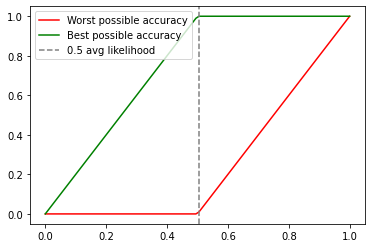

In [12]:
def metric_pressure():
    n_likelihoods = 100
    x = np.linspace(0, 1, n_likelihoods) # likelihood
    y = np.linspace(0, 1, n_likelihoods) # accuracy
    acc_worst = 2*(np.clip(x, 0.5, 1)-0.5)
    acc_best = np.clip(2*x, 0, 1)
    fig, ax1 = plt.subplots()

    ax1.set_ylim(-0.05, 1.05)
    ax1.plot(x, acc_worst, color="red", label="Worst possible accuracy")
    ax1.plot(x, acc_best, color="green", label="Best possible accuracy")
    # ax1.plot((0, x[np.argmax(x>=0.5)]), (0.5, 0.5), "--", color="grey",)
    ax1.axvline(x[np.argmax(x>=0.5)], color="grey", linestyle="--", label="0.5 avg likelihood")
    ax1.legend()

metric_pressure()